# Construindo o dataset perfeito para o grupo EF (Estoque Fácil)

In [ ]:
!pip install faker

In [ ]:
import pandas as pd
from faker import Faker
import random
from collections import Counter

# Inicializa o Faker com locale dos EUA
faker = Faker('en_US')

# Define categorias e seus pesos
categorias_e_pesos = {
    'Electronics': 2,
    'Clothing': 3,
    'Books': 1,
    'Gardening': 2,
    'Food': 2
}

# Cria uma lista de categorias ponderada
categorias_ponderadas = []
for categoria, peso in categorias_e_pesos.items():
    categorias_ponderadas.extend([categoria] * peso)

# Define faixas de preço por categoria
faixas_de_preco = {
    'Electronics': (200, 2000),
    'Clothing': (50, 300),
    'Books': (10, 100),
    'Gardening': (20, 200),
    'Food': (5, 50)
}

data = []
for _ in range(500):
    nome_usuario = faker.name()
    genero = random.choice(['Male', 'Female'])
    endereco = faker.address()
    data_chegada = faker.date_between(start_date='-1y', end_date='today')

    # Escolhe a categoria usando a lista ponderada
    categoria_produto = random.choice(categorias_ponderadas)

    # Obter a faixa de preço para a categoria escolhida
    faixa_de_preco = faixas_de_preco[categoria_produto]

    # Gerar o preço dentro da faixa
    preco_produto = round(random.uniform(*faixa_de_preco), 2)

    quantidade = random.randint(1, 5)

    # Formata data_chegada no padrão dos EUA (MM/DD/AAAA)
    data_chegada_str = data_chegada.strftime('%m/%d/%Y')

    data.append([nome_usuario, genero, endereco, data_chegada_str, categoria_produto, preco_produto, quantidade])

df = pd.DataFrame(data, columns=['nome_usuario', 'genero', 'endereco', 'data_chegada', 'categoria_produto', 'preco_produto', 'quantidade'])
df.to_csv('dataset_encomendas_us_aprimorado.csv', index=False)

# Verificar a distribuição das categorias
contagem_categorias = Counter(df['categoria_produto'])
print("Distribuição das Categorias:")
print(contagem_categorias)

Distribuição das Categorias:
Counter({'Clothing': 151, 'Electronics': 102, 'Food': 102, 'Gardening': 96, 'Books': 49})


# Importação de Bibliotecas e Carregamento do Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o dataset com o nome do arquivo
df = pd.read_csv('dataset_encomendas_us_aprimorado.csv')

In [ ]:
# Exibe as primeiras 5 linhas do dataset para uma visão geral
print(df.head())

      nome_usuario  genero                                           endereco  \
0  David Robertson    Male              577 Roy Prairie\nNew Stacie, WA 90171   
1    Matthew Scott  Female  5042 Allen Mission Apt. 271\nSouth Taylor, CA ...   
2   William Knight    Male               4927 Lisa Lock\nMoorehaven, LA 79322   
3    Adam Sandoval  Female  40922 Donna Extensions\nNorth Amandatown, AK 2...   
4     Erika Hebert    Male  522 Ashley Parks Suite 997\nEast Tinatown, NE ...   

  data_chegada categoria_produto  preco_produto  quantidade  
0   05/23/2023          Clothing          86.01           1  
1   01/07/2024       Electronics        1434.82           4  
2   07/14/2023          Clothing          59.28           4  
3   04/22/2024         Gardening          90.14           5  
4   08/30/2023         Gardening         189.03           1  


In [ ]:
# Verifica o número de linhas e colunas do dataset
print(df.shape)

(500, 7)


In [ ]:
# Obtém informações sobre os tipos de dados de cada coluna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nome_usuario       500 non-null    object 
 1   genero             500 non-null    object 
 2   endereco           500 non-null    object 
 3   data_chegada       500 non-null    object 
 4   categoria_produto  500 non-null    object 
 5   preco_produto      500 non-null    float64
 6   quantidade         500 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 27.5+ KB
None


In [ ]:
# Verifica se há valores ausentes em cada coluna
print(df.isnull().sum())

nome_usuario         0
genero               0
endereco             0
data_chegada         0
categoria_produto    0
preco_produto        0
quantidade           0
dtype: int64


In [ ]:
# Obtém estatísticas descritivas (média, desvio padrão, etc.) para colunas numéricas
print(df.describe())

       preco_produto  quantidade
count     500.000000  500.000000
mean      315.898060    3.028000
std       488.379836    1.437828
min         5.060000    1.000000
25%        46.322500    2.000000
50%       123.400000    3.000000
75%       249.012500    4.000000
max      1996.370000    5.000000


# Fazendo a EDA ( EXPLORATION DATA ANALYSIS )

In [ ]:
# Conta a quantidade de homens e mulheres no dataset
genero_counts = df['genero'].value_counts()
print(genero_counts)

genero
Female    251
Male      249
Name: count, dtype: int64


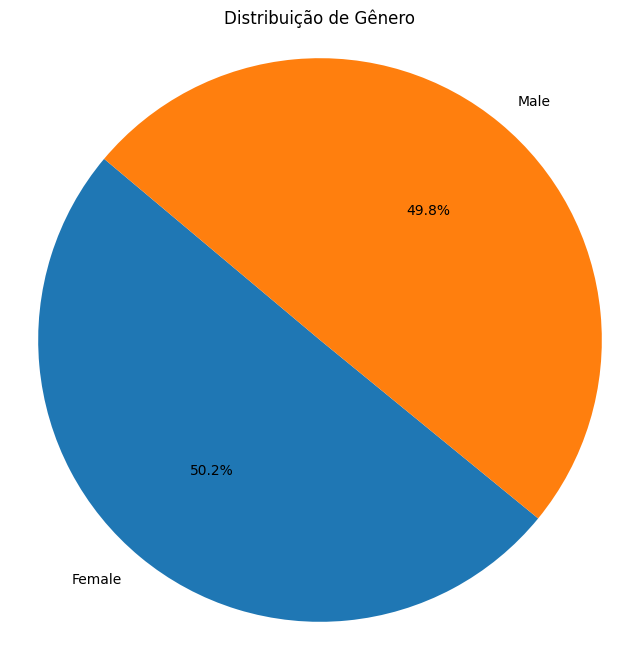

In [ ]:
# Visualiza a distribuição de gênero com um gráfico de pizza
plt.figure(figsize=(8, 8))  # Define o tamanho da figura como quadrado para ficar em formato de pizza
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=140)  # Cria o gráfico de pizza com porcentagens
plt.title('Distribuição de Gênero')  # Define o título do gráfico
plt.axis('equal')  # Faz com que o gráfico fique em formato de círculo
plt.show()  # Exibe o gráfico


# Distribuição das Categorias de Produtos

In [ ]:
# Conta a quantidade de produtos em cada categoria
categoria_counts = df['categoria_produto'].value_counts()
print(categoria_counts)

categoria_produto
Clothing       151
Electronics    102
Food           102
Gardening       96
Books           49
Name: count, dtype: int64


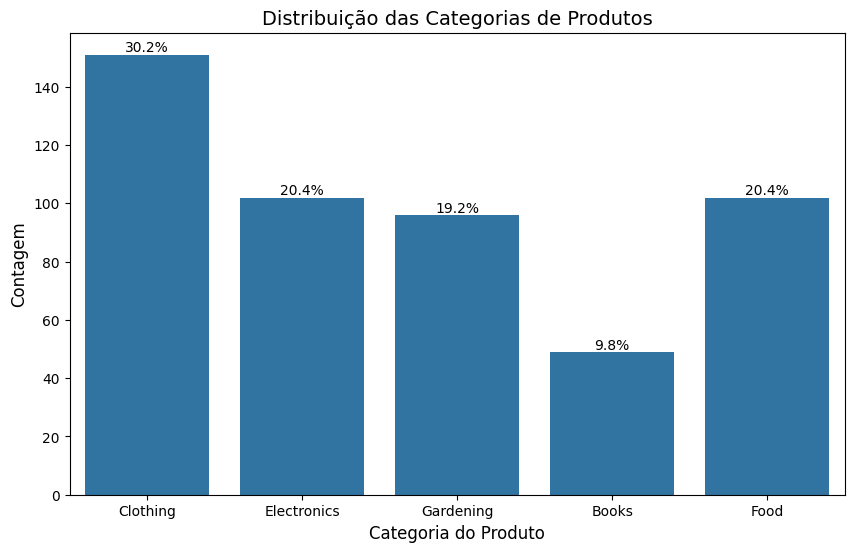

In [ ]:
# Visualiza a distribuição das categorias com um gráfico de barras e porcentagens
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
ax = sns.countplot(x='categoria_produto', data=df)  # Cria o gráfico de barras
plt.xlabel('Categoria do Produto', fontsize=12)  # Define o rótulo do eixo x
plt.ylabel('Contagem', fontsize=12)  # Define o rótulo do eixo y
plt.title('Distribuição das Categorias de Produtos', fontsize=14)  # Define o título do gráfico

# Adiciona rótulos com as porcentagens acima das barras
total = len(df['categoria_produto'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)  # Calcula a porcentagem
    x = p.get_x() + p.get_width() / 2  # Obtém a posição x do centro da barra
    y = p.get_height()  # Obtém a altura da barra (contagem)
    ax.annotate(percentage, (x, y), ha='center', va='bottom')  # Adiciona o texto da porcentagem

plt.show()  # Exibe o gráfico

# Análise de Preços

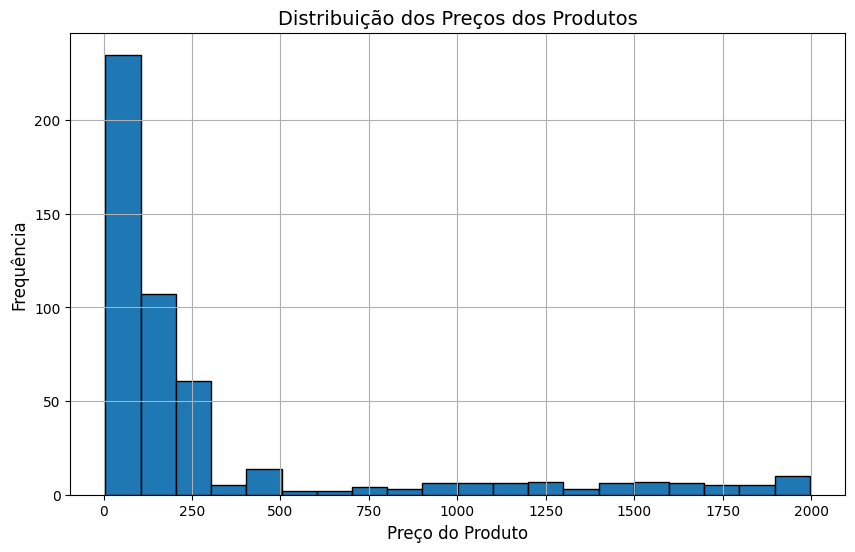

In [ ]:
# Visualiza a distribuição dos preços dos produtos com um histograma
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.hist(df['preco_produto'], bins=20, edgecolor='black')  # Cria o histograma com 20 divisões
plt.xlabel('Preço do Produto', fontsize=12)  # Define o rótulo do eixo x
plt.ylabel('Frequência', fontsize=12)  # Define o rótulo do eixo y
plt.title('Distribuição dos Preços dos Produtos', fontsize=14)  # Define o título do gráfico
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.show()  # Exibe o gráfico

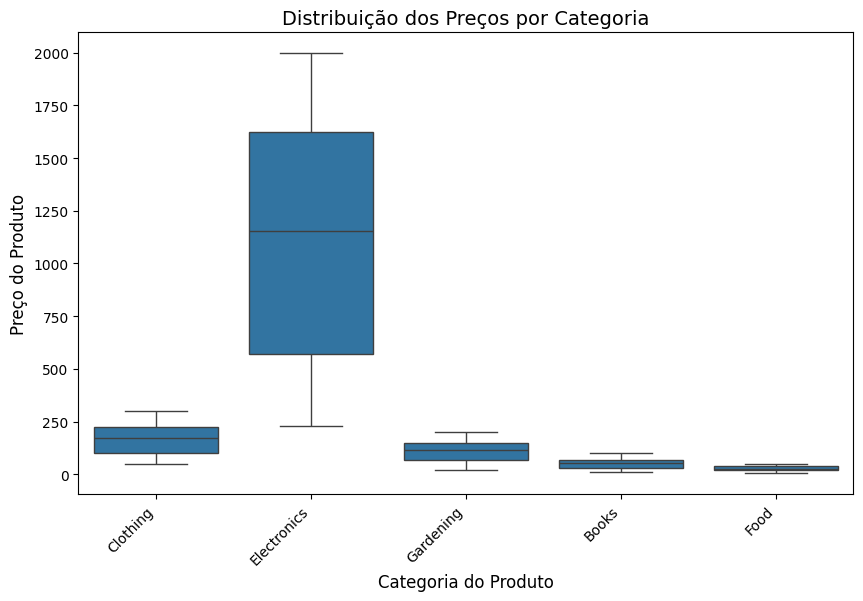

In [ ]:
# Visualiza a distribuição dos preços por categoria com um box plot
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.boxplot(x='categoria_produto', y='preco_produto', data=df)  # Cria o box plot
plt.xlabel('Categoria do Produto', fontsize=12)  # Define o rótulo do eixo x
plt.ylabel('Preço do Produto', fontsize=12)  # Define o rótulo do eixo y
plt.title('Distribuição dos Preços por Categoria', fontsize=14)  # Define o título do gráfico
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()  # Exibe o gráfico

#  Análise por Gênero

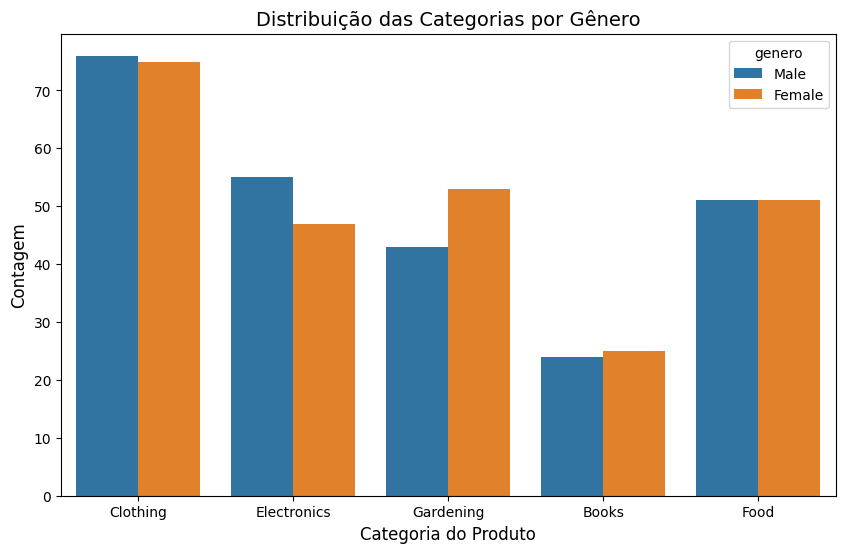

In [ ]:
# Distribuição das categorias de produtos por gênero
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.countplot(x='categoria_produto', hue='genero', data=df)  # Cria o gráfico de barras com grupos por gênero
plt.xlabel('Categoria do Produto', fontsize=12)  # Define o rótulo do eixo x
plt.ylabel('Contagem', fontsize=12)  # Define o rótulo do eixo y
plt.title('Distribuição das Categorias por Gênero', fontsize=14)  # Define o título do gráfico
plt.show()  # Exibe o gráfico

# Análise de Grupos
# A análise de grupos nos permite dividir os dados em subconjuntos com base em certas características e explorar padrões dentro desses grupos. Usaremos o método groupby() do Pandas para realizar essa análise.

In [ ]:
# Calcula o gasto médio por gênero e categoria de produto
gasto_medio = df.groupby(['genero', 'categoria_produto'])['preco_produto'].mean()
print(gasto_medio)

genero  categoria_produto
Female  Books                  49.369200
        Clothing              181.914000
        Electronics          1028.056596
        Food                   29.147451
        Gardening             112.526792
Male    Books                  52.367500
        Clothing              159.699211
        Electronics          1228.964727
        Food                   28.647647
        Gardening             112.886047
Name: preco_produto, dtype: float64


In [ ]:
# Encontra o produto mais caro comprado por cada gênero
produtos_mais_caros = df.groupby('genero')['preco_produto'].max()
print(produtos_mais_caros)

genero
Female    1939.82
Male      1996.37
Name: preco_produto, dtype: float64


In [ ]:
# Conta o número de compras por gênero e categoria
quantidade_compras = df.groupby(['genero', 'categoria_produto'])['quantidade'].sum()
print(quantidade_compras)

genero  categoria_produto
Female  Books                 59
        Clothing             230
        Electronics          143
        Food                 149
        Gardening            172
Male    Books                 84
        Clothing             221
        Electronics          180
        Food                 155
        Gardening            121
Name: quantidade, dtype: int64


# Recomendação de Produtos (Recomendação):
# Objetivo: Recomendar produtos aos usuários com base na categoria de compras de cada usuário



In [ ]:
import pandas as pd
from IPython.display import clear_output

# Carrega o dataset (substitua pelo caminho do seu arquivo)
df = pd.read_csv("dataset_encomendas_us_aprimorado.csv")

# Dicionário de recomendações por categoria
recomendações = {
    'Electronics': ["Apple Iphone 15", "Samsung Smart TV 8K", "Sony", "LG", "Dell"],
    'Clothing': ["Nike T-shirt", "Adidas Tênis", "Zara", "H&M", "Uniqlo"],
    'Books': ["Amazon Kindle", "Barnes & Noble Nook", "Kobo", "Apple Books"],
    'Gardening': ["Home Depot", "Lowe's", "Walmart Garden Center", "Amazon Plants"],
    'Food': ["Whole Foods Market", "Trader Joe's", "Instacart", "Uber Eats"]
}

def recomendar_produtos(nome_usuario):
    try:
        # Encontra a categoria de produto do usuário no dataset
        categoria_usuario = df.loc[df['nome_usuario'] == nome_usuario, 'categoria_produto'].iloc[0]

        # Obtém a lista de recomendações para a categoria
        lista_recomendacoes = recomendações[categoria_usuario]

        # Exibe as recomendações
        print(f"Recomendações para {nome_usuario} (Categoria: {categoria_usuario}):")
        for marca in lista_recomendacoes:
            print(f"- {marca}")
    except IndexError:
        print(f"Usuário {nome_usuario} não encontrado no dataset.")

# Loop para receber input do usuário
while True:
    clear_output(wait=True)  # Limpa a saída anterior
    nome_usuario = input("Digite o nome do usuário (ou 'sair' para terminar): ")
    if nome_usuario.lower() == 'sair':
        break
    recomendar_produtos(nome_usuario)
    print("-" * 30)

print("Obrigado por utilizar o sistema de recomendação.")

Digite o nome do usuário (ou 'sair' para terminar): sair
Obrigado por utilizar o sistema de recomendação.


# O modelo Flask está no VSCODE